# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

--------------Type the answers below this line--------------
</br></br>
Ans1. Problem Statment:- This dataset is used to predict whether a patient is likely to get stroke</br></br>

Ans2. We are performing <b>classification</b> task where we are predicitng that a patient is likely to get stroke or not.

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [309]:
##---------Type the code below this line------------------##
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


url="https://raw.githubusercontent.com/bhavuksagar/stroke_prediciton/main/stroke_data.csv"

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [287]:
##---------Type the code below this line------------------##

df=pd.read_csv(url)

print("Size of the Data:",df.shape,end="\n\n")
print("Features in our dataset:",df.columns,end="\n\n")
print("Type of Data attributes:",df.info())
df.head()

Size of the Data: (5112, 12)

Features in our dataset: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5112 non-null   int64  
 1   gender             5111 non-null   object 
 2   age                5112 non-null   float64
 3   hypertension       5112 non-null   int64  
 4   heart_disease      5112 non-null   int64  
 5   ever_married       5112 non-null   object 
 6   work_type          5112 non-null   object 
 7   Residence_type     5112 non-null   object 
 8   avg_glucose_level  5112 non-null   float64
 9   bmi                4911 non-null   float64
 10  smoking_status     5108 non-null   object 
 11  strok

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [288]:
##---------Type the code below this line------------------##
df.isnull().sum() #checking missing values 

id                     0
gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         4
stroke                 0
dtype: int64

In [289]:
#filling NaN values
df["gender"].fillna(df["gender"].mode()[0],inplace=True,axis=0)
df["smoking_status"].fillna(df["smoking_status"].mode()[0],inplace=True,axis=0)
df["bmi"].fillna(df["bmi"].median(),inplace=True,axis=0)


df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [290]:
##---------Type the code below this line------------------##
#checking duplicate values
df.duplicated().sum()

2

In [291]:
#removing duplicate values
df.drop_duplicates(inplace=True)

## 3.2 Encode categorical data

In [292]:
#checking unique values in categorical features
print(df["gender"].unique())
print(df["ever_married"].unique())
print(df["Residence_type"].unique())
print(df["work_type"].unique())
print(df["smoking_status"].unique())

['Male' 'Female']
['Yes' 'No']
['Urban' 'Rural']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes']


In [293]:
##---------Type the code below this line------------------##
df["gender"]=pd.get_dummies(df["gender"],drop_first=True)
df["ever_married"]=pd.get_dummies(df["ever_married"],drop_first=True)
df["Residence_type"]=pd.get_dummies(df["Residence_type"],drop_first=True)

df=pd.get_dummies(df,prefix_sep="_",columns=["work_type"])
df=pd.get_dummies(df,prefix_sep="_",columns=["smoking_status"])


In [294]:
df.head() #printing first 5 rows of data

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.0,1,0,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,1,0


## 3.3 Feature Engineering 

if any

In [295]:
##---------Type the code below this line------------------##
df.drop("id",inplace=True,axis=1) #ID feature is not usefull in training model so we are removing it

## 3.4 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [296]:
##---------Type the code below this line------------------##
y=df["stroke"]
x=df.drop("stroke",axis=1)

In [297]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [298]:
#handling imbalance class
from imblearn.over_sampling import SMOTE
balance=SMOTE()
x,y=balance.fit_resample(x,y)

## 3.5 Split the data into training set and testing set

In [299]:
##---------Type the code below this line------------------##
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=True)

## 3.6 Normalize the data

In [300]:
##---------Type the code below this line------------------##
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

##---------Type the answer below this line------------------##

1. <b>Remove duplicate data:</b> Yes our dataset had 2 duplicate values and we use the drop_duplicate function to remove the duplicate value</br></br>

2. <b>Impute or remove missing data:</b> Yes our dataset has the missing values and we impute the missing values. For imputing we used the concept of Measures of Central Tendency (Mode/mean/median).

  -> For categorical features we used the <b>Mode</b> for imputing the values. We used mode because it is the best   fuction for filling the Nan values in categorical features</br>
  -> For numerical feature we used the <b>Median</b> for imputing the values. We used median because bmi column has the outliers and mean doesn't work great with outliers.</br></br>
-> Columns which has the missing values :</br>
1. gender --->     1</br>
2. bmi --->                201</br>
3. smoking_status --->        4</br>
</br></br>

3. <b>Data inconsistencies </b>: No our data doesn't have inconsistency. All values in our dataset is in same form</br></br>

4. <b>Encode categorical data</b> : Yes we encoded our categorical features with the help of pandas inbuilt get_dummies() function which perform the <b>OneHotEncoding</b>. So for encoding our categorical features we used the OneHotEncoding concept.

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [301]:
##---------Type the code below this line------------------##
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential


model=Sequential()
model.add(Dense(16,activation="relu",input_shape=(16, )))
model.add(Dense(10,activation="relu"))
model.add(Dropout(.20))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [302]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 16)                272       
                                                                 
 dense_65 (Dense)            (None, 10)                170       
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_66 (Dense)            (None, 10)                110       
                                                                 
 dense_67 (Dense)            (None, 1)                 11        
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

##---------Type the answer below this line------------------##

1. <b>Number of layers</b>: We are using 5 layers in our model. 1 Input layer, 2 Hidden Layer, 1 Dropout and 1 Output layer.
2. <b>Number of units in each layer</b>:

  -> Input Layer: In input layer we have 16 units because our dataset have 16 features.</br>
  -> Hidden Layer: In both hidden layer we have 10 units.</br>
  -> Dropout Layer: We have dropout layer in our model which is probability is 20% of deactivting of neuron for saving model from overfitting.</br>
  -> Output layer: In output layer we have 1 unit because our problem is binary classification so it generating 1                        output.</br></br>
  

3. <b>Activation function used in each layer</b>: We have used Relu in input and hidden layer and sigmoid in output layer. Relu is the one of the best activation function and also providing the high accuracy. And in output layer we used sigmoid because of problem is binary classification and sigmoid perform well in binary classification problem.</br></br>

4. <b>Activation function used in output layer</b>: In output layer we used sigmoid because of problem is binary classification and sigmoid perform well in binary classification problem. Sigmoid function generats the output in 0 to 1 range.</br></br>

5. <b>Total number of trainable parameters:</b> We have total 563 trainable parameter in our model

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [303]:
##---------Type the code below this line------------------##


#Hyperparameter testing
from tensorflow.keras.optimizers import Adam,Adagrad,SGD
from tensorflow.keras.callbacks import EarlyStopping

ear=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto"
)
''''
model1=Sequential()
model1.add(Dense(16,activation="relu",input_shape=(16, )))
model1.add(Dense(10,activation="relu"))
model1.add(Dropout(.20))
model1.add(Dense(10,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

adam=Adam(learning_rate=0.01)
adagrad=Adagrad(learning_rate=0.01)
sgd=SGD(learning_rate=0.01)
opt=[adam,adagrad,sgd]
score=[]
for i in range(len(opt)): 
    model1.compile(optimizer=opt[i],loss="binary_crossentropy",metrics=["accuracy"])
    model1.fit(x_train,y_train,epochs=10,validation_split=.10,batch_size=200,callbacks=ear)
    score.append(model.evaluate(x_test,y_test)[1])
    
'''
  
print("Accuracy with different optimizer:",score)


Accuracy with different optimizer: [0.9177377820014954, 0.9177377820014954, 0.9177377820014954]


In [304]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

## 5.2 Train the model

In [305]:
##---------Type the code below this line------------------##
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=200,callbacks=ear)

Epoch 1/20
39/39 [==============================] - 1s 7ms/step - loss: 0.6023 - accuracy: 0.6706 - val_loss: 0.5154 - val_accuracy: 0.7897
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4999 - accuracy: 0.7594 - val_loss: 0.3950 - val_accuracy: 0.8607
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8132 - val_loss: 0.3047 - val_accuracy: 0.8848
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.8487 - val_loss: 0.2571 - val_accuracy: 0.8977
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.8741 - val_loss: 0.2339 - val_accuracy: 0.9018
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2720 - accuracy: 0.8829 - val_loss: 0.2221 - val_accuracy: 0.9095
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2570 - accuracy: 0.8911 - val_loss: 0.2137 - val_accuracy: 0.9080
Epoch 8/20
39/39 [==

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answers below this line------------------##
1. <b>Optimizers:</b> We have used ADAM optimizer in our model beacuse its performing well on our data</br></br>
2. <b>Regulizations:</b> We have used Dropout regulization in our model for preventing from Overfitting. We are deactivating 20% neuron in dropout layer</br></br>
3. <b>Hyperparameters:</b> We have used different optimizer and we got almost same accuracy from all the optimizer and also used the batch concept and we are passing 200 data per batch.

# 6. Test the model

Score: 2 Marks

In [306]:
##---------Type the code below this line------------------##

y_pred1 = model.predict(x_test)
y_pred = np.argmax(y_pred1, axis=1)
print(y_pred)

61/61 [==============================] - 0s 1ms/step
[0 0 0 ... 0 0 0]


## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

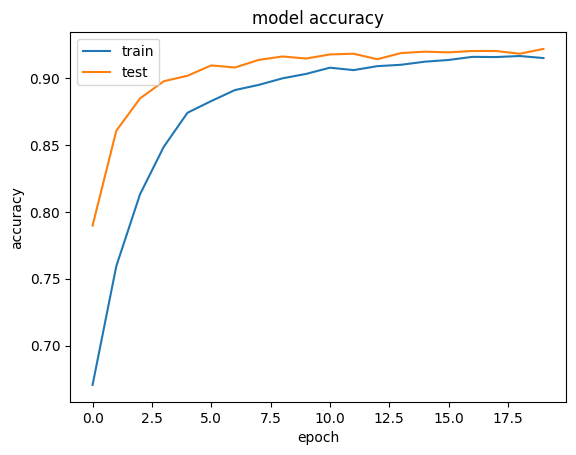

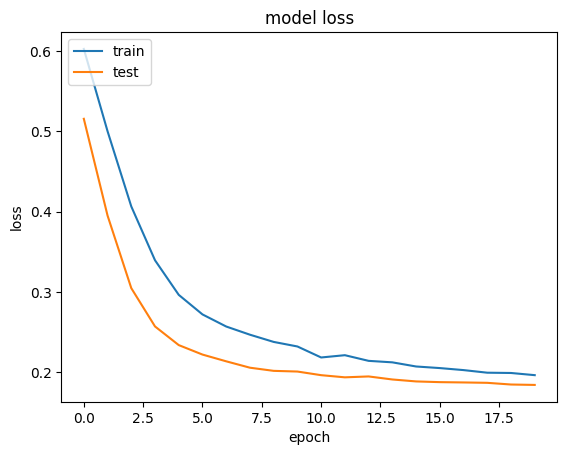

61/61 [==============================] - 0s 2ms/step



 ************F1, Precision, and Recall scores**************

->Precision Score: 0.2498714652956298
->Recall Score: 0.5
->F1 Score: 0.3332190606787796
61/61 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9219
->Accuracy: 0.9218509197235107
->Confusion Matrix:
 [[972   0]
 [973   0]]

->Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       972
           1       0.00      0.00      0.00       973

    accuracy                           0.50      1945
   macro avg       0.25      0.50      0.33      1945
weighted avg       0.25      0.50      0.33      1945



In [310]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,classification_report
y_pred1 = model.predict(x_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print("\n\n\n ************F1, Precision, and Recall scores**************\n")
print("->Precision Score:",precision_score(y_test, y_pred , average="macro"))
print("->Recall Score:",recall_score(y_test, y_pred , average="macro"))
print("->F1 Score:",f1_score(y_test, y_pred , average="macro"))
print("->Accuracy:",model.evaluate(x_test,y_test)[1])
print("->Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\n->Classification Report:\n",classification_report(y_test, y_pred))

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

##---------Type the answers below this line------------------##

1. <b>Solution Proposed</b>:We have developed a model which is able to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.</br></br>

2. <b>Challenges, Observations and Decisions made</b>:
a. Our dataset had the missing values which was later filled with the help of Measures of Central Tendency (Mode/mean/median). concept.</br>
b. We transformed our data in the format which is required to our model.</br>
c. We observe during analysis of our data that our data is imbalance. Pepole don't get stroke data is high then the people got stroke which we handled by upsampling the data.</br>
d. We checked different optimizer and got the almost same accuracy with all the optimizers.</br>
e. Our dataset also has the 2 duplicate values which we removed from the dataset.</br>
f. We used the Dropout layer for avoding the overfitting and successfully handled that because on test and train data we are getting 92% accuracy.</br>
g. We also use the early stopping for avoiding extra calculation and extra processing.

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck